# tensorflow

In [19]:
import numpy as np
import tensorflow as tf

In [2]:
M = 2 #dim
K = 3 #class
n = 100
N = n*K #num of obs

In [10]:
X1 = np.random.randn(n,M) + np.array((0,10))
X2 = np.random.randn(n,M) + np.array((5,5))
X3 = np.random.randn(n,M) + np.array((10,10))

Y1 = np.array( [[1,0,0] for i in range(100)])
Y2 = np.array( [[0,1,0] for i in range(100)])
Y3 = np.array( [[0,0,1] for i in range(100)])

In [11]:
X = np.concatenate((X1,X2,X3), axis = 0)
Y = np.concatenate((Y1,Y2,Y3), axis = 0)

In [12]:
X.shape

(300, 2)

In [13]:
Y.shape

(300, 3)

In [20]:
W = tf.Variable(tf.zeros([M,K])) #(2,3)
b = tf.Variable(tf.zeros([K])) # (1,3)

x = tf.placeholder(tf.float32, shape = [None, M]) #2
t = tf.placeholder(tf.float32, shape = [None, K]) #3
y = tf.nn.softmax(tf.matmul(x,W) + b)

In [50]:
cross_entropy = -tf.reduce_mean(t * tf.log(y), axis = 1)
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

In [51]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [52]:
batch_size = 50
n_batch = 300//batch_size

In [53]:
from sklearn.utils import shuffle
for epoch in range(100) :
    X_, Y_ = shuffle(X, Y)
    
    for i in range(n_batch) :
        start = i*batch_size
        end = start + batch_size
        sess.run(train_step, feed_dict={
            x : X_[start:end,:],
            t : Y_[start:end,:]
        })

In [67]:
correct_prediction = tf.cast(tf.equal(tf.argmax(t, axis = 1), tf.argmax(y, axis =1)), dtype = tf.int32)

<tf.Tensor 'Cast_3:0' shape=(?,) dtype=int32>

In [68]:
sess.run(correct_prediction, feed_dict={
    x:X ,
    t:Y
})

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [27]:
import matplotlib.pyplot as plt
c1 = np.zeros([100])+1
c2 = np.zeros([100])+2
c3 = np.zeros([100])+3

c = np.concatenate((c1,c2,c3), axis = 0)
c.shape

(300,)

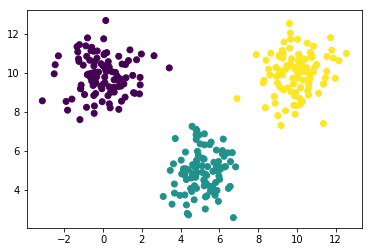

In [33]:
plt.scatter(X[:,0],X[:,1],c = c)

# Keras

In [69]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

Using TensorFlow backend.


In [71]:
model = Sequential()
model.add(Dense(input_dim = M, units = K))
model.add(Activation('softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = SGD(lr = 0.1))

In [74]:
minibatch_size = 50
model.fit(X,Y,epochs=100, batch_size=M, verbose = 0)

In [75]:
model.predict(X)

array([[9.99991417e-01, 8.56078441e-06, 1.45010253e-08],
       [9.99999881e-01, 1.07420313e-07, 9.01697272e-10],
       [9.99962568e-01, 3.73982366e-05, 1.12885390e-08],
       [9.99999762e-01, 2.30372635e-07, 2.11502222e-11],
       [9.99999046e-01, 9.90386638e-07, 9.07085351e-10],
       [1.00000000e+00, 5.70694425e-08, 7.24362514e-11],
       [9.99998927e-01, 1.10752603e-06, 2.61986044e-10],
       [1.00000000e+00, 1.28834765e-08, 3.66015863e-11],
       [1.00000000e+00, 3.84648615e-08, 3.45855393e-11],
       [9.99984980e-01, 1.50706846e-05, 3.78787171e-08],
       [9.99994397e-01, 5.56151599e-06, 2.18013820e-08],
       [9.99998212e-01, 1.75806144e-06, 6.72341419e-11],
       [1.00000000e+00, 3.51579699e-09, 3.11588234e-12],
       [9.99999762e-01, 2.95680252e-07, 9.58245594e-10],
       [9.99913454e-01, 5.81972999e-05, 2.83358750e-05],
       [1.00000000e+00, 1.22593005e-10, 4.23973600e-13],
       [1.00000000e+00, 1.64745950e-09, 8.70786082e-12],
       [9.99997139e-01, 2.85951

In [85]:
np.mean(model.predict_classes(X) == np.argmax(Y,1))

1.0